In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat/test.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/sample_submission.csv


In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [3]:
train = pd.read_csv('../input/cat-in-the-dat/train.csv')
test = pd.read_csv('../input/cat-in-the-dat/test.csv')

In [4]:
train_1=train.drop(columns=['id','nom_9','nom_8'])
test_1=test.drop(columns=['id','nom_9','nom_8'])
train_1

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_7,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,68f6ad3e9,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,3b6dd5612,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,a6a36f527,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,ec69236eb,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,04ddac2be,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,...,86a8e4ca0,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,...,c4455f4a8,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,...,ba9901303,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,Piano,...,c8ae4ea14,1,Master,Boiling Hot,h,W,uJ,3,8,1


In [5]:
train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,149999.500000,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,86602.684716,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,74999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,224999.250000,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,299999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


In [6]:
train.describe(include=['O'])

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,3,6,6,6,4,222,522,1220,2215,11981,5,6,15,26,192
top,T,Y,Green,Trapezoid,Lion,Russia,Oboe,f7821e391,d173ac7ca,3a114adea,c720f85ca,163cc60fa,Novice,Freezing,g,L,od
freq,153535,191633,127341,101181,101295,101123,92293,2801,1218,534,299,72,126583,99816,36405,19066,5019


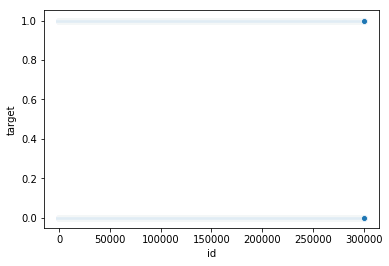

In [7]:
g=sns.scatterplot(data=train, x='id', y='target')

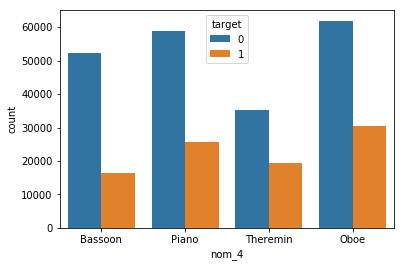

In [8]:
grid = sns.countplot(data=train, x='nom_4',hue='target')


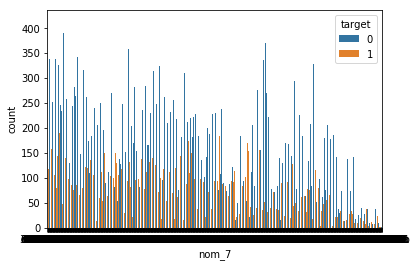

In [9]:
g = sns.countplot(data=train,x="nom_7", hue="target")

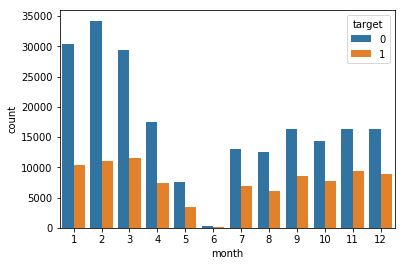

In [10]:
g = sns.countplot(data=train,x="month", hue="target")

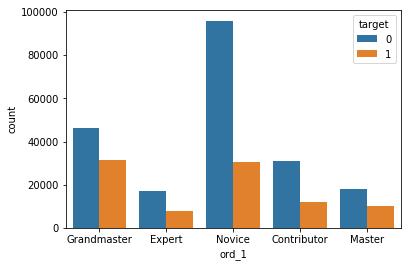

In [11]:
g = sns.countplot(data=train,x='ord_1', hue="target")


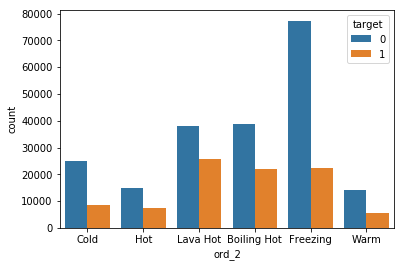

In [12]:
g = sns.countplot(data=train,x='ord_2', hue="target")


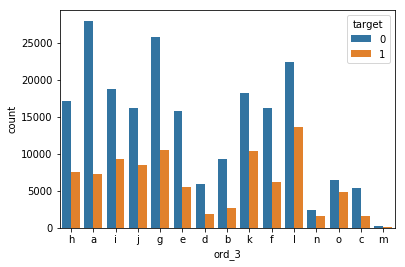

In [13]:
g = sns.countplot(data=train,x='ord_3', hue="target")

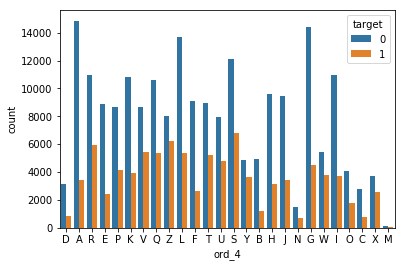

In [14]:
g = sns.countplot(data=train,x='ord_4', hue="target")

In [15]:
for column in train_1.columns:
    if train_1[column].dtype=='O' and train[column].unique().shape[0]>4:
        print(column)
        ts = train_1.groupby(column, as_index=False).agg({'target': 'mean'})
        ts=ts.rename(columns={'target':column+'_new'})
        train_1=pd.merge(train_1,ts,how='left')
        test_1=pd.merge(test_1,ts,how='left')
        train_1=train_1.drop(columns=column)
        test_1=test_1.drop(columns=column)
train_1

nom_1
nom_2
nom_3
nom_5
nom_6
nom_7
ord_1
ord_2
ord_3
ord_4
ord_5


,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_4,ord_0,day,month,...,nom_2_new,nom_3_new,nom_5_new,nom_6_new,nom_7_new,ord_1_new,ord_2_new,ord_3_new,ord_4_new,ord_5_new
0,0,0,0,T,Y,Green,Bassoon,2,2,2,...,0.307162,0.242813,0.358134,0.312718,0.232365,0.403885,0.257877,0.306993,0.208354,0.401186
1,0,1,0,T,Y,Green,Piano,1,7,8,...,0.359209,0.289954,0.388889,0.263658,0.310105,0.403885,0.326315,0.206599,0.186877,0.303880
2,0,0,0,F,Y,Blue,Theremin,1,7,2,...,0.293085,0.289954,0.274564,0.296835,0.206316,0.317175,0.403126,0.306993,0.351864,0.206843
3,0,1,0,F,Y,Red,Oboe,1,2,1,...,0.307162,0.339793,0.234872,0.364255,0.350679,0.403885,0.360961,0.330148,0.208354,0.355985
4,0,0,0,F,N,Red,Oboe,1,7,8,...,0.293085,0.339793,0.312438,0.305964,0.272936,0.403885,0.225214,0.206599,0.351864,0.404345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Oboe,1,3,8,...,0.307162,0.361311,0.328117,0.224792,0.312000,0.278533,0.225214,0.365212,0.266023,0.312962
299996,0,0,0,F,Y,Green,Piano,2,3,2,...,0.293085,0.289954,0.358739,0.417344,0.232614,0.242055,0.225214,0.306993,0.409481,0.224880
299997,0,0,0,F,Y,Blue,Oboe,3,7,9,...,0.319017,0.289954,0.343976,0.342541,0.304569,0.242055,0.360961,0.433657,0.186877,0.178437
299998,0,1,0,F,Y,Green,Piano,1,3,8,...,0.319017,0.314688,0.306356,0.276596,0.424242,0.355078,0.360961,0.306993,0.409481,0.438520


In [16]:
test_1

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_4,ord_0,day,month,...,nom_2_new,nom_3_new,nom_5_new,nom_6_new,nom_7_new,ord_1_new,ord_2_new,ord_3_new,ord_4_new,ord_5_new
0,0,0,1,T,Y,Blue,Piano,2,5,11,...,0.319017,0.242813,0.327116,0.330645,0.299065,0.242055,0.288796,0.342476,0.324947,0.300588
1,0,0,0,T,N,Red,Piano,1,7,5,...,0.293085,0.339793,0.329803,0.399600,0.389796,0.355078,0.403126,0.379277,0.186877,0.244795
2,1,0,1,F,Y,Blue,Piano,2,1,12,...,0.245139,0.311724,0.336677,0.305964,0.317597,0.317175,0.225214,0.206599,0.236891,0.417726
3,0,0,1,T,Y,Red,Piano,1,2,3,...,0.335367,0.311724,0.328419,0.244373,0.361022,0.278533,0.403126,0.220460,0.336264,0.365151
4,0,1,1,F,N,Red,Piano,3,4,11,...,0.245139,0.311724,0.243365,0.330569,0.271300,0.403885,0.403126,0.379277,0.409481,0.389864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,F,N,Green,Theremin,1,1,3,...,0.293085,0.339793,0.309648,0.288889,0.347962,0.242055,0.403126,0.342476,0.186877,0.219193
199996,1,0,0,F,Y,Green,Piano,1,2,2,...,0.293085,0.311724,0.279778,0.255848,0.238683,0.278533,0.403126,0.275018,0.359364,0.198573
199997,0,1,1,T,Y,Green,Oboe,1,3,1,...,0.293085,0.339793,0.359124,0.347594,0.330561,0.242055,0.360961,0.289685,0.386269,0.273736
199998,1,0,0,T,Y,Blue,Bassoon,2,2,1,...,0.359209,0.314688,0.299315,0.336746,0.307143,0.403885,0.360961,0.289685,0.407184,0.282507


In [17]:
train_2=pd.get_dummies(train_1,drop_first=True)
test_x=pd.get_dummies(test_1,drop_first=True)

In [18]:
train_x.shape,test_x.shape

NameError: name 'train_x' is not defined

In [19]:
test_x

,bin_0,bin_1,bin_2,ord_0,day,month,nom_1_new,nom_2_new,nom_3_new,nom_5_new,...,ord_3_new,ord_4_new,ord_5_new,bin_3_T,bin_4_Y,nom_0_Green,nom_0_Red,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,1,2,5,11,0.360978,0.319017,0.242813,0.327116,...,0.342476,0.324947,0.300588,1,1,0,0,0,1,0
1,0,0,0,1,7,5,0.338932,0.293085,0.339793,0.329803,...,0.379277,0.186877,0.244795,1,0,0,1,0,1,0
2,1,0,1,2,1,12,0.338932,0.245139,0.311724,0.336677,...,0.206599,0.236891,0.417726,0,1,0,0,0,1,0
3,0,0,1,1,2,3,0.310627,0.335367,0.311724,0.328419,...,0.220460,0.336264,0.365151,1,1,0,1,0,1,0
4,0,1,1,3,4,11,0.290054,0.245139,0.311724,0.243365,...,0.379277,0.409481,0.389864,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,1,1,3,0.338932,0.293085,0.339793,0.309648,...,0.342476,0.186877,0.219193,0,0,1,0,0,0,1
199996,1,0,0,1,2,2,0.290054,0.293085,0.311724,0.279778,...,0.275018,0.359364,0.198573,0,1,1,0,0,1,0
199997,0,1,1,1,3,1,0.290054,0.293085,0.339793,0.359124,...,0.289685,0.386269,0.273736,1,1,1,0,1,0,0
199998,1,0,0,2,2,1,0.310627,0.359209,0.314688,0.299315,...,0.289685,0.407184,0.282507,1,1,0,0,0,0,0


In [20]:
train_x=train_2.drop(columns='target')
train_y=train['target']

In [21]:
lr=LogisticRegression(random_state=1)
lr.fit(train_x,train_y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predict=lr.predict(test_x)

In [23]:
predict

array([0, 1, 0, ..., 0, 0, 0])

In [24]:
submission=pd.DataFrame({'id':test['id'].values,'target':predict})
submission.to_csv("Submission.csv", index=False)
